In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [177]:
df = pd.read_csv("./data/ProfessionalPlayersDataset-13_3.txt")


C:\Users\Dell\AppData\Local\Temp\ipykernel_10864\4218692671.py:1: DtypeWarning: Columns (50,51,52,53) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("./data/ProfessionalPlayersDataset-13_3.txt")


In [178]:
df.head()

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
0,EUW1_6272362521,Blue,anonymous 2,euw1,Akshan,0.000000,554.0,581.0,1.0,0.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,TOP
1,EUW1_6272362521,Blue,anonymous 2,euw1,Akshan,1.000300,3177.0,8848.0,1.0,0.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,TOP
2,EUW1_6272362521,Blue,anonymous 2,euw1,Akshan,2.000733,2665.0,13301.0,1.0,2.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,TOP
3,EUW1_6272362521,Blue,anonymous 2,euw1,Akshan,1.932467,NaN,NaN,NaN,NaN,...,NaN,NaN,False,SkillLevelUp,1.0,NaN,NaN,NaN,NaN,TOP
4,EUW1_6272362521,Blue,anonymous 2,euw1,Akshan,3.001000,3352.0,13461.0,3.0,14.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,TOP


In [179]:
df['role'].unique()

array(['TOP', 'JUNGLE', 'MIDDLE', 'BOTTOM', 'UTILITY'], dtype=object)

In [180]:
df.shape

(392071, 55)

In [181]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
392066    False
392067    False
392068    False
392069    False
392070    False
Length: 392071, dtype: bool

In [182]:
df.isnull().sum()

gameId                                0
team                                  0
summoner                              0
region                                0
champion                              0
timestamp                             0
coordinate_x                     174453
coordinate_y                     174453
level                            261168
minionsKilled                    261168
jungleMinionsKilled              261168
currentGold                      261168
goldPerSecond                    261168
totalGold                        261168
xp                               261168
abilityPower                     261168
armor                            261168
armorPen                         261168
armorPenPercent                  261168
attackDamage                     261168
attackSpeed                      261168
ccReduction                      261168
health                           261168
healthMax                        261168
healthRegen                      261168


In [183]:
test = pd.DataFrame(data=df['gameId'].unique(), columns=[df.columns[df.columns.get_loc('gameId')]])
test

,gameId
0,EUW1_6272362521
1,EUW1_6272332377
2,EUW1_6271940279
3,EUW1_6270844496
4,EUW1_6270805157
...,...
3941,KR_6376023042
3942,KR_6376046864
3943,KR_6376025758
3944,KR_6376000151


In [184]:
df.head()

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
0,EUW1_6272362521,Blue,anonymous 2,euw1,Akshan,0.000000,554.0,581.0,1.0,0.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,TOP
1,EUW1_6272362521,Blue,anonymous 2,euw1,Akshan,1.000300,3177.0,8848.0,1.0,0.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,TOP
2,EUW1_6272362521,Blue,anonymous 2,euw1,Akshan,2.000733,2665.0,13301.0,1.0,2.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,TOP
3,EUW1_6272362521,Blue,anonymous 2,euw1,Akshan,1.932467,NaN,NaN,NaN,NaN,...,NaN,NaN,False,SkillLevelUp,1.0,NaN,NaN,NaN,NaN,TOP
4,EUW1_6272362521,Blue,anonymous 2,euw1,Akshan,3.001000,3352.0,13461.0,3.0,14.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,TOP


## __Preprocessing Patch 13.3 dataset__

In [185]:
df['eventType'].unique()

array([nan, 'SkillLevelUp', 'Death', 'Assist', 'Elite Monster Kill',
       'Building Kill', 'Item purchased'], dtype=object)

In [186]:
df_relevant = df[(df['eventType'] == 'Death') & (df['role'] == 'JUNGLE')]
df_coordinates = df_relevant[['coordinate_x', 'coordinate_y', 'timestamp']]
df_coordinates

,coordinate_x,coordinate_y,timestamp
5915,8286.0,7654.0,5.672050
5938,10048.0,8002.0,17.020000
5946,6100.0,11267.0,21.701117
5951,9475.0,8919.0,23.496983
5958,11804.0,13243.0,27.062767
...,...,...,...
275711,1722.0,9788.0,26.279650
275716,3384.0,11610.0,29.629633
275722,6544.0,14078.0,32.611683
275750,5575.0,8675.0,12.166683


### __Separating the dataframe in blue side and red side__

<code> Inside league of legends, deaths per map side is the first important measure to check </code>

In [187]:
df_relevant_blue = df[(df['eventType'] == 'Death') & (df['role'] == 'JUNGLE') & (df['team'] == 'Blue')]
df_coordinates_blue = df_relevant_blue[['coordinate_x', 'coordinate_y', 'timestamp']]
df_relevant_red = df[(df['eventType'] == 'Death') & (df['role'] == 'JUNGLE') & (df['team'] == 'Red')]
df_coordinates_red = df_relevant_red[['coordinate_x', 'coordinate_y', 'timestamp']]


In [188]:
df_relevant.shape, df_relevant_blue.shape, df_relevant_red.shape

((4255, 55), (1896, 55), (2359, 55))

The above code processes a dataset of League of Legends professional matches, focusing on jungle deaths. It filters the data to include only relevant events, checks for duplicates and missing values, and separates the data into blue and red team deaths. 

The shapes of the resulting dataframes are displayed to confirm the filtering process. Further analysis can be performed on these subsets to understand spatio-temporal patterns in jungle deaths across different matches.

---

### __Checking missing values__

##### __Total__

In [189]:
df_coordinates.isnull().sum()

coordinate_x    0
coordinate_y    0
timestamp       0
dtype: int64

##### __Blue and Red__

In [190]:
print("Missing values for blue side:\n",df_coordinates_blue.isnull().sum())

print("Missing values for red side:\n",df_coordinates_red.isnull().sum())

Missing values for blue side:
 coordinate_x    0
coordinate_y    0
timestamp       0
dtype: int64
Missing values for red side:
 coordinate_x    0
coordinate_y    0
timestamp       0
dtype: int64


##### __Checking Duplicated values__

In [218]:
print("Duplicated values for general dataset: \n",df_coordinates.duplicated().sum())
print("Duplicated values for Blue side dataset: \n",df_coordinates_blue.duplicated().sum())
print("Duplicated values for Red side dataset: \n",df_coordinates_red.duplicated().sum())

Duplicated values for general dataset: 
 0
Duplicated values for Blue side dataset: 
 0
Duplicated values for Red side dataset: 
 0


---

### __Scaling for regularization__

<code> Scaling all 3 dataframes __|Total| & |Blue| & |Red|__ for KMedoid model application </code>

##### __Total__

In [191]:
scaler = StandardScaler()
array_scaled = scaler.fit_transform(df_coordinates)
df_scaled = pd.DataFrame(array_scaled, columns=['coordinate_x', 'coordinate_y', 'timestamp'])
df_scaled.head()

,coordinate_x,coordinate_y,timestamp
0,0.212408,0.165875,-1.310751
1,0.720901,0.268041,0.066829
2,-0.418446,1.226577,0.635091
3,0.555539,0.537253,0.853100
4,1.227661,1.806689,1.285967


##### __Blue__

In [192]:
scaler = StandardScaler()
array_blue_scaled = scaler.fit_transform(df_coordinates_blue)
df_blue_scaled = pd.DataFrame(array_blue_scaled, columns=['coordinate_x', 'coordinate_y', 'timestamp'])
df_blue_scaled.head()

,coordinate_x,coordinate_y,timestamp
0,1.121752,1.104564,0.447337
1,0.191930,-0.531315,-1.606708
2,-0.271009,0.785549,-1.097190
3,-0.767196,0.855548,-0.645988
4,1.759385,-1.080877,-0.436290


##### __Red__

In [193]:
scaler = StandardScaler()
array_red_scaled = scaler.fit_transform(df_coordinates_red)
df_red_scaled = pd.DataFrame(array_red_scaled, columns=['coordinate_x', 'coordinate_y', 'timestamp'])
df_red_scaled.head()

,coordinate_x,coordinate_y,timestamp
0,0.169550,0.139079,-1.303330
1,0.689690,0.240163,0.082401
2,-0.475755,1.188544,0.654025
3,0.520541,0.506523,0.873324
4,1.208059,1.762511,1.308752


---

### __Clustering KMedoids__

<code> Applying the KMedoids model in all 3 dataframes __|Total| & |Blue| & |Red|__ </code>

In [194]:
from sklearn_extra.cluster import KMedoids

##### __Total__

In [ ]:
k_values = [2, 3, 4, 5, 6, 7, 8, 9] # Reduced range for faster execution
best_silhouette = -1  # Initialize with a value lower than any possible score
best_k = 0
results = {} # to store all scores

print("Starting K-Medoids clustering analysis...")

for k in k_values:
    # 1. Initialize and fit the K-Medoids model
    kmedoids = KMedoids(n_clusters=k, random_state=42, metric='euclidean', method='pam', )
    labels = kmedoids.fit_predict(df_scaled)
    
    # 2. Calculate the silhouette score
    silhouette = silhouette_score(df_scaled, labels)
    results[k] = silhouette # Store the result
    
    print(f"  - For k = {k}, silhouette score is {silhouette:.4f}")
    
    # 3. Check if this is the best score so far
    if silhouette > best_silhouette:
        best_silhouette = silhouette
        best_k = k

# Print the final best result outside the loop
print("\n--- Analysis Complete ---")
print(f" Best number of clusters (k): {best_k}")
print(f" Best silhouette score: {best_silhouette:.4f}")

Starting K-Medoids clustering analysis...
  - For k = 2, silhouette score is 0.2951
  - For k = 3, silhouette score is 0.2914
  - For k = 4, silhouette score is 0.3134
  - For k = 5, silhouette score is 0.2814
  - For k = 6, silhouette score is 0.2716
  - For k = 7, silhouette score is 0.2732
  - For k = 8, silhouette score is 0.2615
  - For k = 9, silhouette score is 0.2549

--- Analysis Complete ---
 Best number of clusters (k): 4
 Best silhouette score: 0.3134


Applied KMedoid parameters: metric='euclidean' and method='pam' for greater robustness and better precision.

Even though method = 'pam' requires more computing work and slows down the code, that project aims to try to improve the original project model.

##### __Blue__

In [196]:
k_values = range(2,7) # Reduce the range for faster execution
best_blue_silhouette = -1  # Initialize with a value lower than any possible score
best_blue_k = 0
results = {} # to store all scores

print("Starting K-Medoids clustering analysis...")

for k in k_values:
    # 1. Initialize and fit the K-Medoids model
    kmedoids = KMedoids(n_clusters=k, random_state=42, metric='euclidean', method='pam')
    blue_labels = kmedoids.fit_predict(df_blue_scaled)
    
    # 2. Calculate the silhouette score
    blue_silhouette = silhouette_score(df_blue_scaled, blue_labels)
    results[k] = blue_silhouette # Store the result
    
    print(f"  - For k = {k}, silhouette score is {blue_silhouette:.4f}")
    
    # 3. Check if this is the best score so far
    if blue_silhouette > best_blue_silhouette:
        best_blue_silhouette = blue_silhouette
        best_blue_k = k

# Print the final best result outside the loop
print("\n--- Analysis Complete ---")
print(f" Best number of clusters (k): {best_blue_k}")
print(f" Best silhouette score: {best_blue_silhouette:.4f}")

Starting K-Medoids clustering analysis...
  - For k = 2, silhouette score is 0.3005
  - For k = 3, silhouette score is 0.2996
  - For k = 4, silhouette score is 0.3101
  - For k = 5, silhouette score is 0.2795
  - For k = 6, silhouette score is 0.2650

--- Analysis Complete ---
 Best number of clusters (k): 4
 Best silhouette score: 0.3101


##### __Red__

In [197]:
k_values = range(2,7) # Reduce the range for faster execution
best_red_silhouette = -1  # Initialize with a value lower than any possible score
best_red_k = 0
results = {} # to store all scores

print("Starting K-Medoids clustering analysis...")

for k in k_values:
    # 1. Initialize and fit the K-Medoids model
    kmedoids = KMedoids(n_clusters=k, random_state=42, metric='euclidean', method='pam')
    red_labels = kmedoids.fit_predict(df_red_scaled)
    
    # 2. Calculate the silhouette score
    red_silhouette = silhouette_score(df_red_scaled, red_labels)
    results[k] = red_silhouette # Store the result
    
    print(f"  - For k = {k}, silhouette score is {red_silhouette:.4f}")
    
    # 3. Check if this is the best score so far
    if red_silhouette > best_red_silhouette:
        best_red_silhouette = red_silhouette
        best_red_k = k

# Print the final best result outside the loop
print("\n--- Analysis Complete ---")
print(f" Best number of clusters (k): {best_red_k}")
print(f" Best silhouette score: {best_red_silhouette:.4f}")

Starting K-Medoids clustering analysis...
  - For k = 2, silhouette score is 0.2909
  - For k = 3, silhouette score is 0.2876
  - For k = 4, silhouette score is 0.3132
  - For k = 5, silhouette score is 0.2839
  - For k = 6, silhouette score is 0.2735

--- Analysis Complete ---
 Best number of clusters (k): 4
 Best silhouette score: 0.3132


---

### __Ploting Elbow similarly to the original plot__
 <code>Implementing 2 new parameters __metric__ and __localte_elbow__</code> 

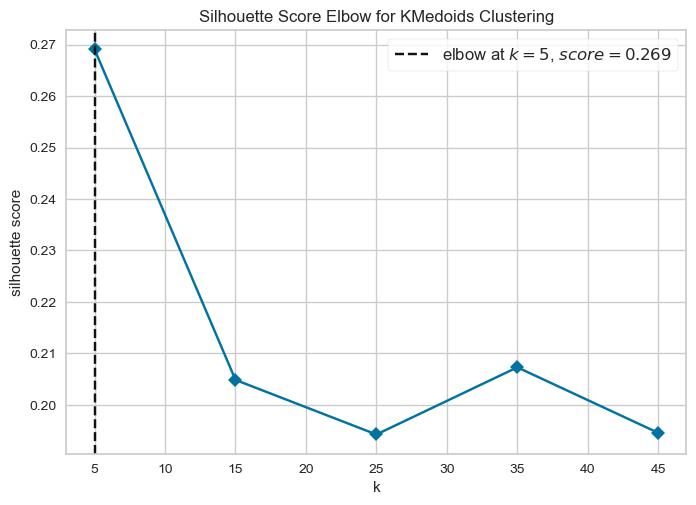

Optimal number of clusters k based on the elbow method: 5


In [198]:
from yellowbrick.cluster import KElbowVisualizer
ks = np.arange(5,50, 10)
model = KMedoids()
visualizer = KElbowVisualizer(model, k=ks, timings=False, metric='silhouette', locate_elbow=True)

visualizer.fit(df_scaled) # Fit the data to the visualizer
visualizer.show() 
print("Optimal number of clusters k based on the elbow method:", visualizer.elbow_value_)

### Now I'll change the "ks" range, trying not to missing optimal __k__ values
<code> And also add more parameters, on the KMedoids model.</code>

---

##### __Silhouette Scores__

##### __Total__

In [199]:
silhouette_scores = []
k_values = range(2, 21)
for k in k_values:
    kmedoids = KMedoids(n_clusters=k, random_state=42, metric='euclidean')
    # method='pam' slows down the process, but it is more robust
    labels = kmedoids.fit_predict(df_scaled)
    silhouette_scores.append(silhouette_score(df_scaled, labels))

# Select optimal k based on silhouette score
optimal_k = k_values[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters: {optimal_k} (Silhouette Score: {max(silhouette_scores):.3f})")

# Fit KMedoids with optimal k
kmedoids = KMedoids(n_clusters=optimal_k, random_state=42, metric='euclidean')
labels = kmedoids.fit_predict(df_scaled)

Optimal number of clusters: 4 (Silhouette Score: 0.309)


##### __Blue Side__

In [201]:
blue_silhouette_scores = []
k_values = range(2, 21)
for k in k_values:
    kmedoids = KMedoids(n_clusters=k, random_state=42, metric='euclidean')
    # method='pam' slows down the process, but it is more robust
    blue_labels = kmedoids.fit_predict(df_blue_scaled)
    blue_silhouette_scores.append(silhouette_score(df_blue_scaled, blue_labels))

# Select optimal k based on silhouette score
optimal_k = k_values[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters: {optimal_k} (Silhouette Score: {max(blue_silhouette_scores):.3f})")

# Fit KMedoids with optimal k
kmedoids = KMedoids(n_clusters=optimal_k, random_state=42, metric='euclidean')
blue_labels = kmedoids.fit_predict(df_blue_scaled)

Optimal number of clusters: 4 (Silhouette Score: 0.301)


##### __Red side__

In [202]:
red_silhouette_scores = []
k_values = range(2, 21)
for k in k_values:
    kmedoids = KMedoids(n_clusters=k, random_state=42, metric='euclidean')
    # method='pam' slows down the process, but it is more robust
    red_labels = kmedoids.fit_predict(df_red_scaled)
    red_silhouette_scores.append(silhouette_score(df_red_scaled, red_labels))

# Select optimal k based on silhouette score
optimal_k = k_values[np.argmax(red_silhouette_scores)]
print(f"Optimal number of clusters: {optimal_k} (Silhouette Score: {max(red_silhouette_scores):.3f})")

# Fit KMedoids with optimal k
kmedoids = KMedoids(n_clusters=optimal_k, random_state=42, metric='euclidean')
red_labels = kmedoids.fit_predict(df_red_scaled)

Optimal number of clusters: 4 (Silhouette Score: 0.311)


##### __Elbow Plot for total data__

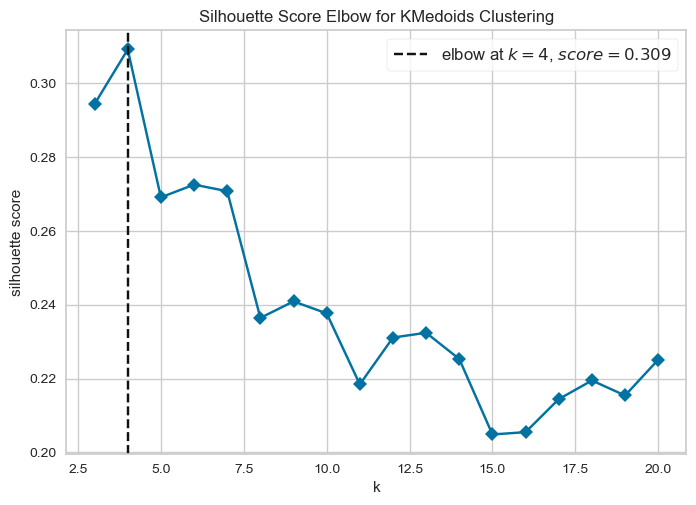

Optimal number of clusters k based on the elbow method: 4


In [203]:
from yellowbrick.cluster import KElbowVisualizer
ks = np.arange(3,21)
model = KMedoids()
visualizer = KElbowVisualizer(model, k=ks, timings=False, metric='silhouette', locate_elbow=True)

visualizer.fit(df_scaled)        # Fit the data to the visualizer
visualizer.show() 
print("Optimal number of clusters k based on the elbow method:", visualizer.elbow_value_)

##### __Elbow Plot for Blue side data__

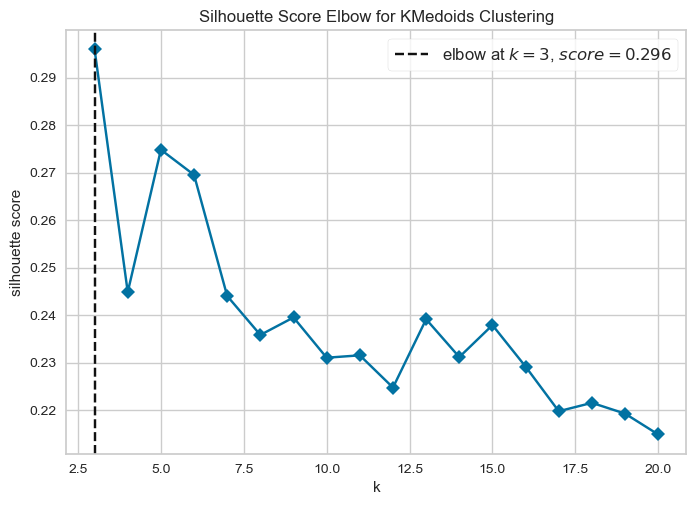

Optimal number of clusters k based on the elbow method: 3


In [204]:
from yellowbrick.cluster import KElbowVisualizer
ks = np.arange(3,21)
model = KMedoids()
visualizer = KElbowVisualizer(model, k=ks, timings=False, metric='silhouette', locate_elbow=True)

visualizer.fit(df_blue_scaled)        # Fit the data to the visualizer
visualizer.show() 
print("Optimal number of clusters k based on the elbow method:", visualizer.elbow_value_)

##### __Elbow Plot for Red side data__

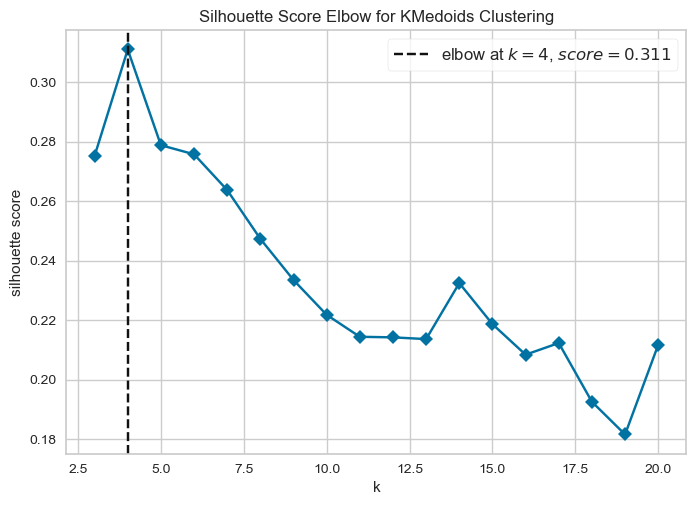

Optimal number of clusters k based on the elbow method: 4


In [205]:
from yellowbrick.cluster import KElbowVisualizer
ks = np.arange(3,21)
model = KMedoids()
visualizer = KElbowVisualizer(model, k=ks, timings=False, metric='silhouette', locate_elbow=True)

visualizer.fit(df_red_scaled)        # Fit the data to the visualizer
visualizer.show() 
print("Optimal number of clusters k based on the elbow method:", visualizer.elbow_value_)

---

### __Scatter plot for deaths locations in game timestamp__

##### __Total__

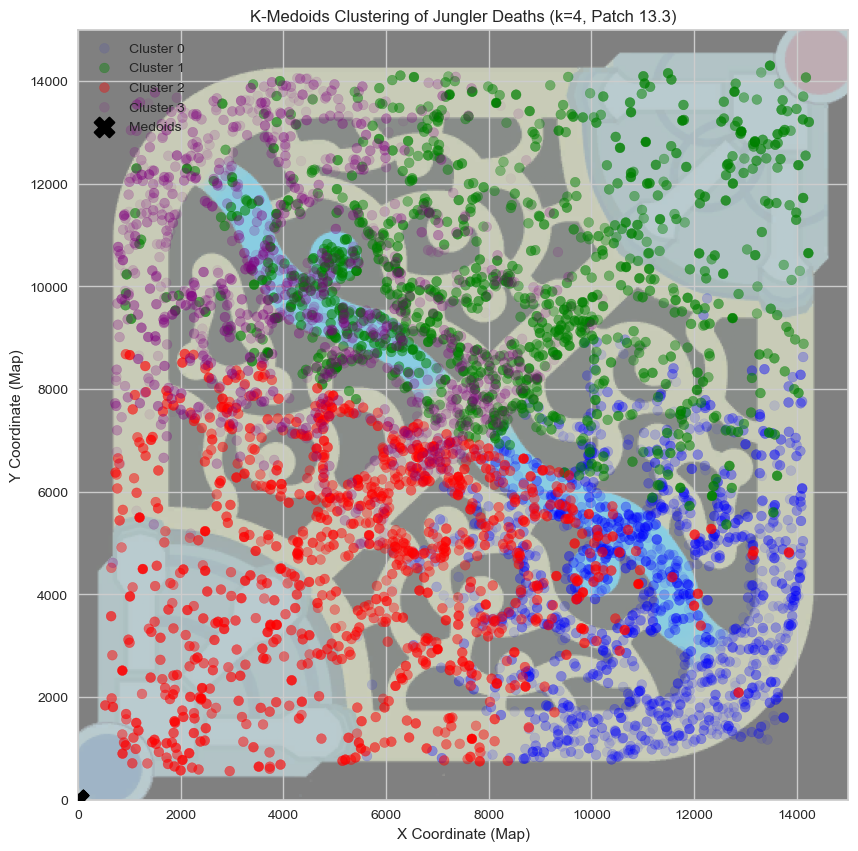

In [222]:
import matplotlib.image as mpimg

map_image_path = './data/map11.png'
fig, ax = plt.subplots(figsize=(10, 10))
try:
    map_img = mpimg.imread(map_image_path)
    ax.imshow(map_img, extent=[0, 15000, 0, 15000], alpha=0.5)
except FileNotFoundError:
    print("Map image not found. Plotting without background.")

colors = ['blue', 'green', 'red', 'purple', 'orange', 'cyan', 'magenta']
for lab in np.unique(labels):
    mask = labels == lab
    # Scale transparency based on timestamp (early game: more transparent, late game: more opaque)
    alpha = df_coordinates['timestamp'][mask] / df_coordinates['timestamp'].max()
    plt.scatter(
        df_coordinates['coordinate_x'][mask], df_coordinates['coordinate_y'][mask],
        c=colors[lab % len(colors)], label=f'Cluster {lab}',
        alpha=alpha, s=50
    )

medoid_points = df_scaled.iloc[kmedoids.medoid_indices_][['coordinate_x', 'coordinate_y']].values
plt.scatter(medoid_points[:, 0], medoid_points[:, 1], marker='X', s=200, color='black', linewidth=1.5, label='Medoids', zorder=5
)

# Customize plot
plt.xlabel('X Coordinate (Map)')
plt.ylabel('Y Coordinate (Map)')
plt.title(f'K-Medoids Clustering of Jungler Deaths (k={optimal_k}, Patch 13.3)')
plt.legend()
plt.xlim(0, 15000)
plt.ylim(0, 15000)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

##### __Blue__

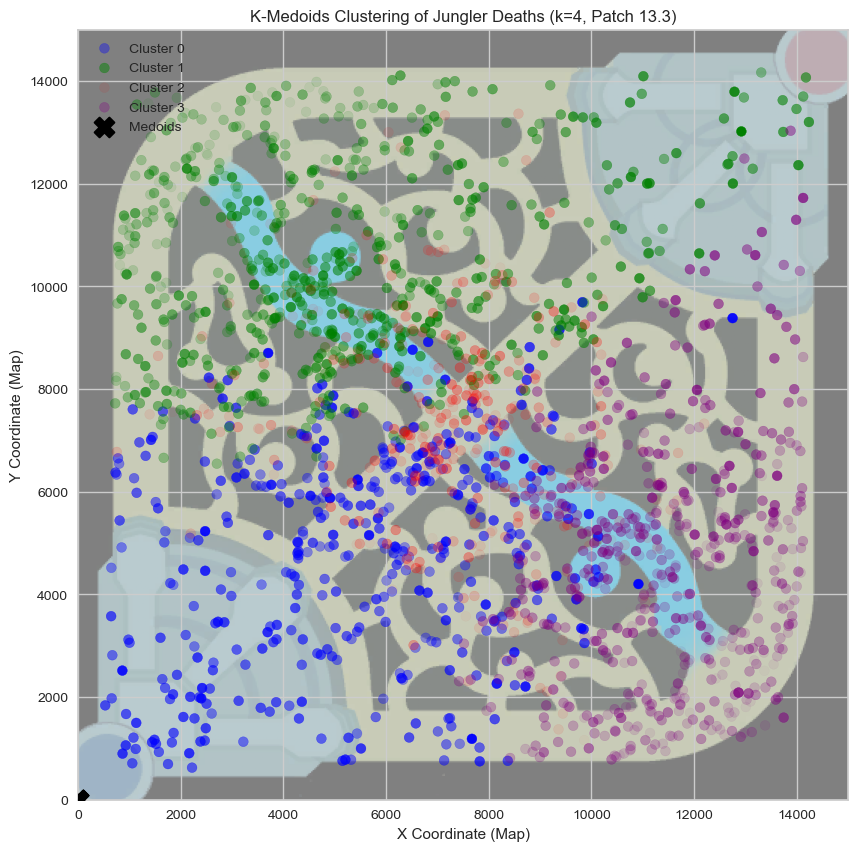

In [223]:
import matplotlib.image as mpimg

map_image_path = './data/map11.png'
fig, ax = plt.subplots(figsize=(10, 10))
try:
    map_img = mpimg.imread(map_image_path)
    ax.imshow(map_img, extent=[0, 15000, 0, 15000], alpha=0.5)
except FileNotFoundError:
    print("Map image not found. Plotting without background.")

colors = ['blue', 'green', 'red', 'purple', 'orange', 'cyan', 'magenta']
for lab in np.unique(blue_labels):
    mask = blue_labels == lab
    # Scale transparency based on timestamp (early game: more transparent, late game: more opaque)
    alpha = df_coordinates_blue['timestamp'][mask] / df_coordinates_blue['timestamp'].max()
    plt.scatter(
        df_coordinates_blue['coordinate_x'][mask], df_coordinates_blue['coordinate_y'][mask],
        c=colors[lab % len(colors)], label=f'Cluster {lab}',
        alpha=alpha, s=50
    )

medoid_points = df_blue_scaled.iloc[kmedoids.medoid_indices_][['coordinate_x', 'coordinate_y']].values
plt.scatter(medoid_points[:, 0], medoid_points[:, 1], marker='X', s=200, color='black', linewidth=1.5, label='Medoids', zorder=5
)

# Customize plot
plt.xlabel('X Coordinate (Map)')
plt.ylabel('Y Coordinate (Map)')
plt.title(f'K-Medoids Clustering of Jungler Deaths (k={optimal_k}, Patch 13.3)')
plt.legend()
plt.xlim(0, 15000)
plt.ylim(0, 15000)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

##### __Red__

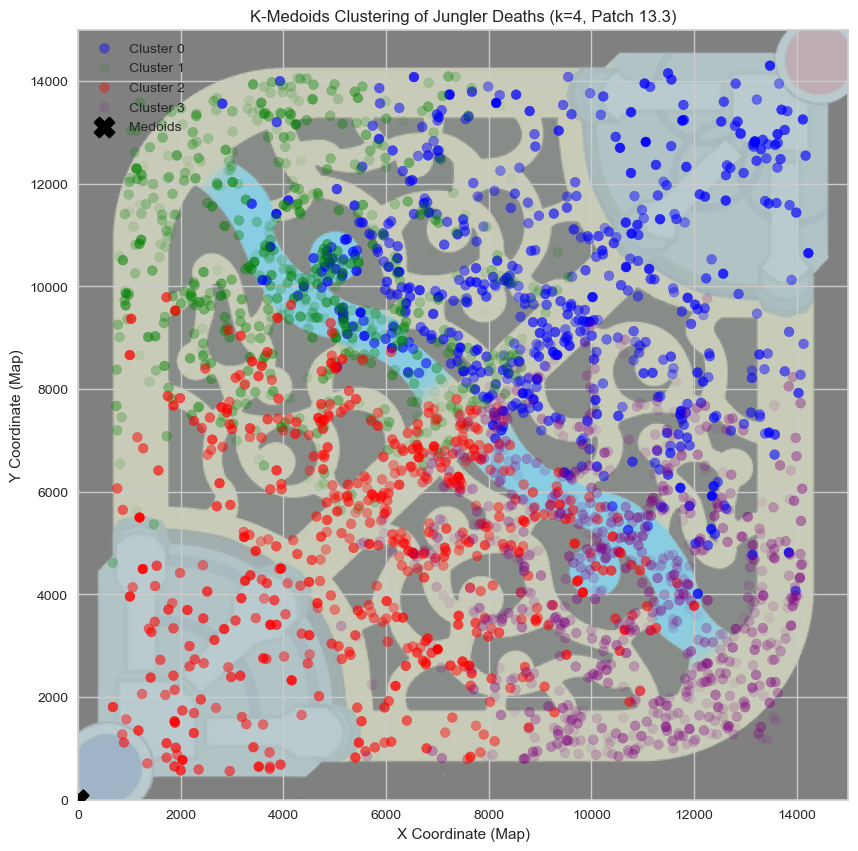

In [224]:
import matplotlib.image as mpimg

map_image_path = './data/map11.png'
fig, ax = plt.subplots(figsize=(10, 10))
try:
    map_img = mpimg.imread(map_image_path)
    ax.imshow(map_img, extent=[0, 15000, 0, 15000], alpha=0.5)
except FileNotFoundError:
    print("Map image not found. Plotting without background.")

colors = ['blue', 'green', 'red', 'purple', 'orange', 'cyan', 'magenta']
for lab in np.unique(labels):
    mask = red_labels == lab
    # Scale transparency based on timestamp (early game: more transparent, late game: more opaque)
    alpha = df_coordinates_red['timestamp'][mask] / df_coordinates_red['timestamp'].max()
    plt.scatter(
        df_coordinates_red['coordinate_x'][mask], df_coordinates_red['coordinate_y'][mask],
        c=colors[lab % len(colors)], label=f'Cluster {lab}',
        alpha=alpha, s=50
    )

medoid_points = df_red_scaled.iloc[kmedoids.medoid_indices_][['coordinate_x', 'coordinate_y']].values
plt.scatter(medoid_points[:, 0], medoid_points[:, 1], marker='X', s=200, color='black', linewidth=1.5, label='Medoids', zorder=5
)

# Customize plot
plt.xlabel('X Coordinate (Map)')
plt.ylabel('Y Coordinate (Map)')
plt.title(f'K-Medoids Clustering of Jungler Deaths (k={optimal_k}, Patch 13.3)')
plt.legend()
plt.xlim(0, 15000)
plt.ylim(0, 15000)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [ ]:
# Conclusion:
# The K-Medoids clustering analysis has been successfully completed for the jungler deaths dataset.
